# [Ερώτημα 1: Feedforward Neural Network]

**[Βήμα 1]** Φόρτωση δεδομένων (mfccs)


In [ ]:
import numpy as np
import torch
from torch.utils.data import DataLoader, TensorDataset

# define paths for training, validation and testing
path_to_data = 'drive/MyDrive/ColabNotebooks2/music_genre_data_di/'
train_path = f'{path_to_data}/train/mfccs'
val_path = f'{path_to_data}/val/mfccs'
test_path = f'{path_to_data}/test/mfccs'

# load the data
def load_data(path):
    X = np.load(f'{path}/X.npy', allow_pickle=True)
    labels = np.load(f'{path}/labels.npy', allow_pickle=True)
    return X, labels

# load train,validation and test data from the paths
X_train, y_train = load_data(train_path)
X_val, y_val = load_data(val_path)
X_test, y_test = load_data(test_path)

# Mapping labels from string to integers
label_mapping = {"classical": 0, "hiphop": 1, "rock_metal_hardrock": 2, "blues": 3}

y_train = np.vectorize(label_mapping.get)(y_train)
y_val = np.vectorize(label_mapping.get)(y_val)
y_test = np.vectorize(label_mapping.get)(y_test)

# Creating PyTorch Dataloaders , with batch size 16
batch_size = 16

train_dataset = TensorDataset(torch.from_numpy(X_train.astype('float32')), torch.from_numpy(y_train))
val_dataset = TensorDataset(torch.from_numpy(X_val.astype('float32')), torch.from_numpy(y_val))
test_dataset = TensorDataset(torch.from_numpy(X_test.astype('float32')), torch.from_numpy(y_test))

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


**[Βήμα 2]** Ορισμός Νευρωνικού Δικτύου

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

# Defining the model class that will later be trained

class FullyConnectedNetwork(nn.Module):
    def __init__(self):
        super(FullyConnectedNetwork, self).__init__()
        self.fc1 = nn.Linear(26, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 32)
        self.fc4 = nn.Linear(32, 4)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x



**[Βήμα 3]** Ορισμός διαδικασίας εκπαίδευσης


In [ ]:
import torch

#function to train the model

def train_model(model, epochs, optimizer, dataloader, loss_function):
    for epoch in range(epochs):
        model.train()  # set model to train state
        epoch_loss = 0
        for batch in dataloader:
            inputs, targets = batch
            optimizer.zero_grad()  # zero older calls
            outputs = model(inputs)  # pass the data to the model
            loss = loss_function(outputs, targets)  # calculate loss
            loss.backward()  # Backpropagation
            optimizer.step()  # update weights

            epoch_loss += loss.item()

        print(f'Epoch {epoch+1}/{epochs}, Loss: {epoch_loss/len(dataloader)}')

    return model


**[Βήμα 4]** Ορισμός διαδικασίας αξιολόγησης

In [ ]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix

# function to evaluate the model

def evaluate(model, dataloader, loss_function):
    model.eval()

    running_loss = 0.0
    all_predictions = []
    all_targets = []

    with torch.no_grad():
        for inputs, labels in dataloader:
            outputs = model(inputs)
            loss = loss_function(outputs, labels)

            running_loss += loss.item() * inputs.size(0)

            _, preds = torch.max(outputs, 1)
            all_predictions.extend(preds.cpu().numpy())
            all_targets.extend(labels.cpu().numpy())

    epoch_loss = running_loss / len(dataloader.dataset)

    f1 = f1_score(all_targets, all_predictions, average='macro')
    accuracy = accuracy_score(all_targets, all_predictions)
    conf_matrix = confusion_matrix(all_targets, all_predictions)

    return epoch_loss, f1, accuracy, conf_matrix


**[Βήμα 5]** Εκπαίδευση δικτύου

In [ ]:
# Define the model
model = FullyConnectedNetwork()

# Define the optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.002)

# Define the loss function
loss_function = torch.nn.CrossEntropyLoss()

#Epochs

epochs=30

# Train the model for 30 epochs
trained_model = train_model(model, epochs , optimizer, train_dataloader, loss_function)

# Evaluate the trained model
test_loss, test_f1, test_accuracy, test_confusion_matrix = evaluate(trained_model, test_dataloader, loss_function)

print("Test Loss: ", test_loss)
print("Test F1-Score: ", test_f1)
print("Test Accuracy: ", test_accuracy)
print("Test Confusion Matrix: \n", test_confusion_matrix)


Epoch 1/30, Loss: 1.39102829515934
Epoch 2/30, Loss: 1.3859259313344956
Epoch 3/30, Loss: 1.3840508097410202
Epoch 4/30, Loss: 1.3819650292396546
Epoch 5/30, Loss: 1.3806284314393997
Epoch 6/30, Loss: 1.3787771224975587
Epoch 7/30, Loss: 1.3767806434631347
Epoch 8/30, Loss: 1.3750288516283036
Epoch 9/30, Loss: 1.3720270323753356
Epoch 10/30, Loss: 1.3701327908039094
Epoch 11/30, Loss: 1.3676866793632507
Epoch 12/30, Loss: 1.3638266068696976
Epoch 13/30, Loss: 1.3605273962020874
Epoch 14/30, Loss: 1.356208485364914
Epoch 15/30, Loss: 1.351056540608406
Epoch 16/30, Loss: 1.3451706671714783
Epoch 17/30, Loss: 1.3378096097707748
Epoch 18/30, Loss: 1.3297643375396728
Epoch 19/30, Loss: 1.319664272069931
Epoch 20/30, Loss: 1.3064722317457198
Epoch 21/30, Loss: 1.2924032974243165
Epoch 22/30, Loss: 1.2753653663396836
Epoch 23/30, Loss: 1.255195088982582
Epoch 24/30, Loss: 1.2321600252389908
Epoch 25/30, Loss: 1.209565201997757
Epoch 26/30, Loss: 1.182772312760353
Epoch 27/30, Loss: 1.16168281

**[Βήμα 6]** Εκπαίδευση δικτύου με GPU


In [ ]:
import time

#basically keeping the functions the same , however the model and data are not transfered to the gpu

import torch

def train_model_gpu(model, epochs, optimizer, dataloader, loss_function, device):
    model = model.to(device)
    for epoch in range(epochs):
        model.train()
        epoch_loss = 0
        for batch in dataloader:
            inputs, targets = batch
            inputs = inputs.to(device)
            targets = targets.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = loss_function(outputs, targets)
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()

        print(f'Epoch {epoch+1}/{epochs}, Loss: {epoch_loss/len(dataloader)}')

    return model

from sklearn.metrics import f1_score, accuracy_score, confusion_matrix

def evaluate_gpu(model, dataloader, loss_function, device):
    model.eval()

    running_loss = 0.0
    all_predictions = []
    all_targets = []

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            loss = loss_function(outputs, labels)

            running_loss += loss.item() * inputs.size(0)

            _, preds = torch.max(outputs, 1)
            all_predictions.extend(preds.cpu().numpy())
            all_targets.extend(labels.cpu().numpy())

    epoch_loss = running_loss / len(dataloader.dataset)

    f1 = f1_score(all_targets, all_predictions, average='macro')
    accuracy = accuracy_score(all_targets, all_predictions)
    conf_matrix = confusion_matrix(all_targets, all_predictions)

    return epoch_loss, f1, accuracy, conf_matrix

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define the model
model = FullyConnectedNetwork().to(device)

# Define the optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.002)

# Define the loss function
loss_function = torch.nn.CrossEntropyLoss()

# Start the timer
start_time = time.time()

epochs = 30

# Train the model on the GPU for 30 epochs
trained_model = train_model_gpu(model, epochs , optimizer, train_dataloader, loss_function, device)

# Stop the timer
end_time = time.time()

# Print the execution time
print("Training time on GPU: ", end_time - start_time)

# Evaluate the trained model
test_loss, test_f1, test_accuracy, test_confusion_matrix = evaluate_gpu(trained_model, test_dataloader, loss_function, device)

print("Test Loss: ", test_loss)
print("Test F1-Score: ", test_f1)
print("Test Accuracy: ", test_accuracy)
print("Test Confusion Matrix: \n", test_confusion_matrix)

Epoch 1/30, Loss: 1.3847871869802475
Epoch 2/30, Loss: 1.3786900532245636
Epoch 3/30, Loss: 1.376316595673561
Epoch 4/30, Loss: 1.3740017163753508
Epoch 5/30, Loss: 1.3714905548095704
Epoch 6/30, Loss: 1.3691770988702774
Epoch 7/30, Loss: 1.3661990082263946
Epoch 8/30, Loss: 1.3635086810588837
Epoch 9/30, Loss: 1.3600367963314057
Epoch 10/30, Loss: 1.3562107765674591
Epoch 11/30, Loss: 1.3515188652276993
Epoch 12/30, Loss: 1.3461676079034806
Epoch 13/30, Loss: 1.3398190194368362
Epoch 14/30, Loss: 1.3323071962594986
Epoch 15/30, Loss: 1.3230338555574417
Epoch 16/30, Loss: 1.3126233917474748
Epoch 17/30, Loss: 1.299664437174797
Epoch 18/30, Loss: 1.283787654042244
Epoch 19/30, Loss: 1.2660838037729263
Epoch 20/30, Loss: 1.244791892170906
Epoch 21/30, Loss: 1.22241737306118
Epoch 22/30, Loss: 1.2005584409832954
Epoch 23/30, Loss: 1.1779187697172164
Epoch 24/30, Loss: 1.1526501974463463
Epoch 25/30, Loss: 1.1365320521593094
Epoch 26/30, Loss: 1.1167799577116966
Epoch 27/30, Loss: 1.103719

**[Βήμα 7]** Επιλογή μοντέλου

In [ ]:
# Define the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define the model
model = FullyConnectedNetwork().to(device)

# Define the optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.002)

# Define the loss function
loss_function = torch.nn.CrossEntropyLoss()

#Epochs

epochs=30

# Define the training function
def train(model, epochs, optimizer, train_dataloader, val_dataloader, loss_function, device):
    best_f1 = -1
    best_model = None

    for epoch in range(epochs):
        # Training step
        for x, y in train_dataloader:
            x = x.to(device)
            y = y.to(device)
            model.train()
            optimizer.zero_grad()
            output = model(x)
            loss = loss_function(output, y)
            loss.backward()
            optimizer.step()

        # Validation step
        model.eval()
        with torch.no_grad():
            for x_val, y_val in val_dataloader:
                output_val = model(x_val)
                # Compute F1 score
                f1_val = f1_score(y_val.cpu().numpy(), torch.argmax(output_val.cpu(), dim=1).numpy(), average='macro')
                if f1_val > best_f1:
                    best_f1 = f1_val
                    best_model = model.state_dict()  # save the model state

    return best_model

# Train the model
best_model = train(model, epochs, optimizer, train_dataloader, val_dataloader, loss_function, device)

# Load the best model weights
model.load_state_dict(best_model)

# Evaluate the model
test_loss, test_f1, test_accuracy, test_confusion_matrix = evaluate(model, test_dataloader, loss_function)

print("Test Loss: ", test_loss)
print("Test F1-Score: ", test_f1)
print("Test Accuracy: ", test_accuracy)
print("Test Confusion Matrix: \n", test_confusion_matrix)

Test Loss:  1.1454373360719792
Test F1-Score:  0.3730357714533004
Test Accuracy:  0.42441860465116277
Test Confusion Matrix: 
 [[272   2   0  23]
 [ 49 175   0 132]
 [ 85 149   2 163]
 [ 92  95   2 135]]


# **[Ερώτημα 2: Convolutional Neural Network]**

**[Βήμα 1]** Φόρτωση δεδομένων (spectrograms)

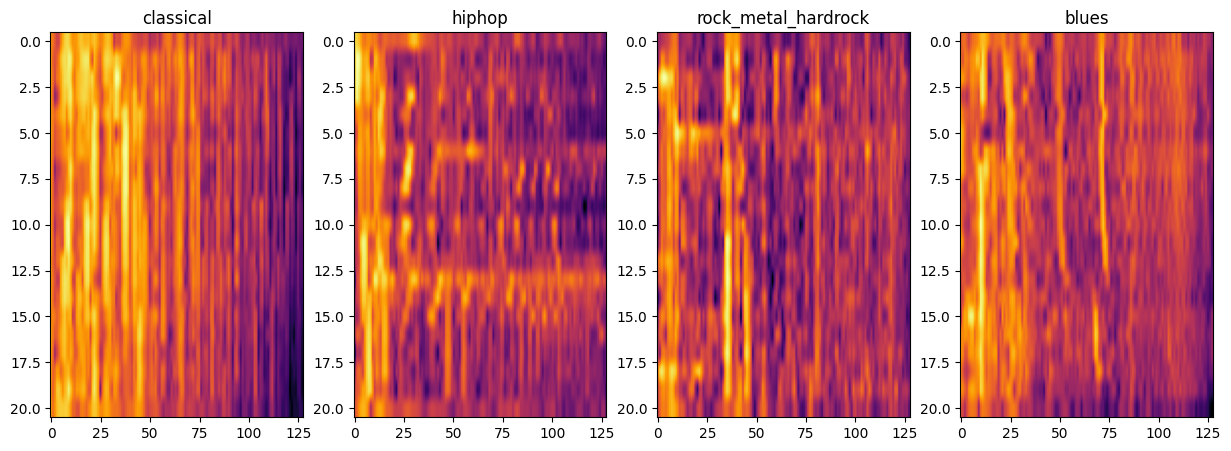

In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import matplotlib.pyplot as plt
import random

# Specify path for training, validation and testing data
path_to_data = 'drive/MyDrive/ColabNotebooks2/music_genre_data_di/'
train_path = f'{path_to_data}/train/melgrams'
val_path = f'{path_to_data}/val/melgrams'
test_path = f'{path_to_data}/test/melgrams'

# Load the data
def load_data(path):
    X = np.load(f'{path}/X.npy', allow_pickle=True)
    labels = np.load(f'{path}/labels.npy', allow_pickle=True)
    return X, labels

# Load training, validation and testing data
X_train, y_train = load_data(train_path)
X_val, y_val = load_data(val_path)
X_test, y_test = load_data(test_path)

# Convert labels from strings to integers
label_mapping = {"classical": 0, "hiphop": 1, "rock_metal_hardrock": 2, "blues": 3}

y_train = np.vectorize(label_mapping.get)(y_train)
y_val = np.vectorize(label_mapping.get)(y_val)
y_test = np.vectorize(label_mapping.get)(y_test)

# Convert data to PyTorch tensors and add channel dimension
X_train = torch.from_numpy(X_train.astype('float32')).unsqueeze(1)
X_val = torch.from_numpy(X_val.astype('float32')).unsqueeze(1)
X_test = torch.from_numpy(X_test.astype('float32')).unsqueeze(1)

y_train = torch.from_numpy(y_train)
y_val = torch.from_numpy(y_val)
y_test = torch.from_numpy(y_test)

# Create PyTorch Dataloaders
batch_size = 4

train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)
test_dataset = TensorDataset(X_test, y_test)

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Select random mel-spectrograms from each class and visualize
random.seed(42)
classes = ['classical', 'hiphop', 'rock_metal_hardrock', 'blues']
fig, axs = plt.subplots(1, len(classes), figsize=(15, 5))

for i, class_name in enumerate(classes):
    class_indices = np.where(y_train == i)[0]
    random_index = random.choice(class_indices)

    mel_spectrogram = X_train[random_index].squeeze() # squeeze to remove channel dimension for visualization
    axs[i].imshow(mel_spectrogram, aspect='auto', cmap='inferno')
    axs[i].set_title(class_name)

plt.show()

**[Βήμα 2]** Ορισμός Νευρωνικού Δικτύου

In [ ]:
class ConvNet(nn.Module):
    def __init__(self, out_dim):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=5, padding=2)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=5, padding=2)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=5, padding=2)
        self.pool3 = nn.MaxPool2d(2, 2)
        self.conv4 = nn.Conv2d(64, 128, kernel_size=5, padding=2)
        self.pool4 = nn.MaxPool2d(2, 2)
        self.adaptive_pool = nn.AdaptiveAvgPool2d((1,1))
        self.fc1 = nn.Linear(128, 1024)  # input size depends on the output of the conv layers
        self.fc2 = nn.Linear(1024, 256)
        self.fc3 = nn.Linear(256, 32)
        self.fc4 = nn.Linear(32, out_dim)

    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = self.pool3(F.relu(self.conv3(x)))
        x = self.pool4(F.relu(self.conv4(x)))
        x = self.adaptive_pool(x)
        x = x.view(-1, 128)  # Flatten tensor
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x


**[Βήμα 3]** Εκπαίδευση δικτύου

Παρατήρησα ότι το shape στα επίπεδα του nn.Linear που πρόσθεσα δεν ταίριαζε με αποτέλεσμα να μην προχωράει σε training το μοντέλο και να χρειάζεται προσθήκη max pooling και padding. Ακόμη , φάνηκε ότι χρειάστηκε να αλλάξουμε λίγο την μορφή των δεδομένων ώστε να περνιούνται σωστά στο μοντέλο . Λάθος δομή [batch_size, height, width] , σωστή δομή [batch_size, num_channels, height, width]. Αυτό το πετύχαμε με την προσθήκη :

```
X_train = torch.from_numpy(X_train.astype('float32')).unsqueeze(1)
X_val = torch.from_numpy(X_val.astype('float32')).unsqueeze(1)
X_test = torch.from_numpy(X_test.astype('float32')).unsqueeze(1)
```

**[Βήμα 4]** Pooling and padding

**1. Pooling** :

Χωρίς padding, οι χωρικές διαστάσεις των χαρτών χαρακτηριστικών εξόδου θα ήταν μικρότερες από την είσοδο. Το padding επιτρέπει στο μοντέλο να αποτυπώνει αποτελεσματικά πληροφορίες από τις άκρες και τις γωνίες των δεδομένων εισόδου που διαφορετικά θα χανόντουσαν. Διατηρώντας αυτές τις πληροφορίες, το padding βελτιώνει την ικανότητα του μοντέλου να μάθει σχετικά μοτίβα και σχέσεις, οδηγώντας σε υψηλότερη ακρίβεια.


**2. Padding** :

Τα επίπεδα pooling μειώνουν τις χωρικές διαστάσεις της εισόδου, μειώνοντας έτσι την υπολογιστική πολυπλοκότητα και τον αριθμό των παραμέτρων στο δίκτυο. Αυτό δεν βοηθά μόνο στο να είναι το μοντέλο πιο αποδοτικό, αλλά βοηθά επίσης στην πρόληψη της υπερεκπαίδευσης, καθώς αναγκάζει το μοντέλο να διατηρήσει μόνο τις πιο σημαντικές πληροφορίες. Το Max pooling, που χρησιμοποιώ στο μοντέλο, πετυχαίνει αυτό διατηρώντας μόνο τη μέγιστη τιμή για κάθε φιλτράρισμα.

**3. Συμπέρασμα** :

Βλέποντας τα αποτελέσματα, φαίνεται ότι η απόδοση του μοντέλου έχει βελτιωθεί με την πάροδο του χρόνου. Οι απώλειες εκπαίδευσης και επικύρωσης μειώνονται, και οι ακρίβειες αυξάνονται, υποδεικνύοντας ότι το μοντέλο μαθαίνει αποτελεσματικά. Η χρήση της τοποθέτησης (padding) και των λειτουργιών pooling έχει συμβάλει σε αυτήν την απόδοση, επιτρέποντας στο μοντέλο να μάθει αποτελεσματικά από τις χωρικές πληροφορίες των δεδομένων, διαχειριζόμενο ταυτόχρονα την υπολογιστική πολυπλοκότητα.


In [ ]:
def train(model, dataloader, loss_function, optimizer):
    model.train()
    running_loss = 0.0
    correct_predictions = 0

    for inputs, labels in dataloader:
        # Forward pass
        outputs = model(inputs)
        loss = loss_function(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Calculate running loss and accuracy
        running_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        correct_predictions += torch.sum(preds == labels.data)

    epoch_loss = running_loss / len(dataloader.dataset)
    epoch_acc = correct_predictions.float() / len(dataloader.dataset)

    return epoch_loss, epoch_acc

def evaluate(model, dataloader, loss_function):
    model.eval()
    running_loss = 0.0
    correct_predictions = 0

    for inputs, labels in dataloader:
        with torch.no_grad():
            outputs = model(inputs)
            loss = loss_function(outputs, labels)

        running_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        correct_predictions += torch.sum(preds == labels.data)

    epoch_loss = running_loss / len(dataloader.dataset)
    epoch_acc = correct_predictions.float() / len(dataloader.dataset)

    return epoch_loss, epoch_acc


# defining loss function and optimizer
# Define the model
model = ConvNet(4)
model = model.to('cuda' if torch.cuda.is_available() else 'cpu')
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

epochs = 10

for epoch in range(epochs):
    train_loss, train_acc = train(model, train_dataloader, loss_function, optimizer)
    val_loss, val_acc = evaluate(model, val_dataloader, loss_function)

    print(f'Epoch {epoch+1}/{epochs}')
    print(f'Training Loss: {train_loss:.4f}, Training Accuracy: {train_acc:.4f}')
    print(f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}')


Epoch 1/10
Training Loss: 0.3449, Training Accuracy: 0.2969
Validation Loss: 0.3424, Validation Accuracy: 0.2500
Epoch 2/10
Training Loss: 0.3277, Training Accuracy: 0.4028
Validation Loss: 0.2870, Validation Accuracy: 0.5362
Epoch 3/10
Training Loss: 0.2642, Training Accuracy: 0.5462
Validation Loss: 0.2408, Validation Accuracy: 0.6100
Epoch 4/10
Training Loss: 0.2352, Training Accuracy: 0.6050
Validation Loss: 0.2305, Validation Accuracy: 0.6500
Epoch 5/10
Training Loss: 0.2178, Training Accuracy: 0.6344
Validation Loss: 0.2119, Validation Accuracy: 0.6737
Epoch 6/10
Training Loss: 0.2067, Training Accuracy: 0.6619
Validation Loss: 0.2107, Validation Accuracy: 0.6300
Epoch 7/10
Training Loss: 0.1930, Training Accuracy: 0.6903
Validation Loss: 0.1987, Validation Accuracy: 0.6900
Epoch 8/10
Training Loss: 0.1886, Training Accuracy: 0.6891
Validation Loss: 0.1903, Validation Accuracy: 0.6975
Epoch 9/10
Training Loss: 0.1712, Training Accuracy: 0.7156
Validation Loss: 0.2072, Validation 

**[Βήμα 5]** Αλγόριθμοι βελτιστοποίησης

Αρχικά , παρατήρησα με δοκιμές στο learning_rate και batch_size , ότι οι καλυτερες τιμές είναι 0,01 και 4 αντίστοιχα. Επίσης, επειδή στο συγκεκριμένο ερώτημα πρέπει να υπολογίσουμε και την f1_score χρειαζόμαστε τα predictions και labels από τις συναρτήσεις train, eval , οπότε τις ξαναόρισα.

Παρατηρούμε ότι ο optimizer **ASGD** είναι ο **καλύτερος** , καθώς επιστρέφει καλύτερα αποτελέσματα σε accuraccy και f1 , για το training , ενώ επίσης ο **Adagrad** και ο **SGD** φαίνεται να επιστρέφουν καλά αποτελέσματα για τις τιμές του validation. Ενώ , ο **SGD** είναι ο **χειρότερος** , καθώς επιστρέφει τα χειρότερα αποτελέσματα , για το training.

In [ ]:
import torch.optim as optim
from sklearn.metrics import f1_score

def train(model, train_dataloader, loss_function, optimizer, device):
    model.train()

    running_loss = 0.0
    correct_predictions = 0

    all_labels = []
    all_predictions = []

    for batch in train_dataloader:
        inputs = batch[0].to(device)
        labels = batch[1].to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = loss_function(outputs, labels)

        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        correct_predictions += torch.sum(preds == labels.data)

        all_labels.append(labels.cpu().numpy())
        all_predictions.append(preds.cpu().numpy())

    epoch_loss = running_loss / len(train_dataloader.dataset)
    epoch_acc = correct_predictions.double() / len(train_dataloader.dataset)

    all_labels = np.concatenate(all_labels)
    all_predictions = np.concatenate(all_predictions)

    return epoch_loss, epoch_acc.item(), all_predictions, all_labels


def evaluate(model, val_dataloader, loss_function, device):
    model.eval()

    running_loss = 0.0
    correct_predictions = 0

    all_labels = []
    all_predictions = []

    with torch.no_grad():
        for batch in val_dataloader:
            inputs = batch[0].to(device)
            labels = batch[1].to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            loss = loss_function(outputs, labels)

            running_loss += loss.item() * inputs.size(0)
            correct_predictions += torch.sum(preds == labels.data)

            all_labels.append(labels.cpu().numpy())
            all_predictions.append(preds.cpu().numpy())

    epoch_loss = running_loss / len(val_dataloader.dataset)
    epoch_acc = correct_predictions.double() / len(val_dataloader.dataset)

    all_labels = np.concatenate(all_labels)
    all_predictions = np.concatenate(all_predictions)

    return epoch_loss, epoch_acc.item(), all_predictions, all_labels


# Define the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Create dictionary for optimizers to be used
optimizers_dict = {"SGD": optim.SGD(model.parameters(), lr=0.01),
                   "Adam": optim.Adam(model.parameters(), lr=0.001),
                   "Adagrad": optim.Adagrad(model.parameters(), lr=0.001),
                   "Adadelta": optim.Adadelta(model.parameters(), lr=0.001),
                   "Adamax": optim.Adamax(model.parameters(), lr=0.001),
                   "ASGD": optim.ASGD(model.parameters(), lr=0.001),
                   "RMSprop": optim.RMSprop(model.parameters(), lr=0.001),
                   "Rprop": optim.Rprop(model.parameters(), lr=0.001)}

# define dictionary to save results
results = {}

# for loop for each optimizer in the dictionary
for name, optimizer in optimizers_dict.items():
    print(f"Training with {name}...")
    train_acc_list = []
    train_f1_list = []
    val_acc_list = []
    val_f1_list = []

    for epoch in range(epochs):
        train_loss, train_acc, train_preds, train_labels = train(model, train_dataloader, loss_function, optimizer, device)
        val_loss, val_acc, val_preds, val_labels = evaluate(model, val_dataloader, loss_function, device)

        train_f1 = f1_score(train_labels, train_preds, average='weighted')
        val_f1 = f1_score(val_labels, val_preds, average='weighted')

        train_acc_list.append(train_acc)
        train_f1_list.append(train_f1)
        val_acc_list.append(val_acc)
        val_f1_list.append(val_f1)

    # Calculate the average loss and f1 score for both training and validation
    avg_train_acc = sum(train_acc_list) / len(train_acc_list)
    avg_train_f1 = sum(train_f1_list) / len(train_f1_list)
    avg_val_acc = sum(val_acc_list) / len(val_acc_list)
    avg_val_f1 = sum(val_f1_list) / len(val_f1_list)
    results[name] = [avg_train_acc, avg_train_f1, avg_val_acc, avg_val_f1]

# print the table of results
print("Optimizer\tTraining Accuracy\tTraining F1\tValidation Accuracy\tValidation F1")
for name, result in results.items():
    print(f"{name}\t\t{result[0]:.4f}\t\t{result[1]:.4f}\t\t{result[2]:.4f}\t\t{result[3]:.4f}")


Training with SGD...
Training with Adam...
Training with Adagrad...
Training with Adadelta...
Training with Adamax...
Training with ASGD...
Training with RMSprop...
Training with Rprop...
Optimizer	Training Accuracy	Training F1	Validation Accuracy	Validation F1
SGD		0.8484		0.8475		0.7145		0.7062
Adam		0.9208		0.9207		0.6922		0.6868
Adagrad		0.9984		0.9984		0.7140		0.7136
Adadelta		0.9997		0.9997		0.7176		0.7168
Adamax		0.9998		0.9998		0.7056		0.7033
ASGD		1.0000		1.0000		0.7027		0.7002
RMSprop		0.9673		0.9673		0.7009		0.6980
Rprop		0.9630		0.9631		0.6854		0.6803


# **[Ερώτημα 3] Improving Performance – προαιρετικό ερώτημα**

**[Βήμα 1]** Reproducibility


In [ ]:
def set_seed(seed_value=42):
    """Set seed for reproducibility.
    """
    random.seed(seed_value)
    np.random.seed(seed_value)
    torch.manual_seed(seed_value)
    torch.cuda.manual_seed_all(seed_value)

def train(model, loss_function, optimizer, train_dataloader):
    """Train the model for one epoch and print the accuracy and loss.
    """
    model.train()

    running_loss = 0.0
    running_corrects = 0

    for batch in train_dataloader:
        inputs = batch[0].to(device)
        labels = batch[1].to(device)
        optimizer.zero_grad()

        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = loss_function(outputs, labels)

        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)

    epoch_loss = running_loss / len(train_dataloader.dataset)
    epoch_acc = running_corrects.double() / len(train_dataloader.dataset)

    print('Training Loss : {:.4f} Accuraccy : {:.4f}'.format(epoch_loss, epoch_acc))

def eval_model(model, loss_function, val_dataloader):
    """Evaluate the model on the validation data and print the accuracy and loss.
    """
    model.eval()
    running_loss = 0.0
    running_corrects = 0

    with torch.no_grad():
        for batch in val_dataloader:
            inputs = batch[0].to(device)
            labels = batch[1].to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            loss = loss_function(outputs, labels)

            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)

    epoch_loss = running_loss / len(val_dataloader.dataset)
    epoch_acc = running_corrects.double() / len(val_dataloader.dataset)

    print('Validation Loss : {:.4f} Accuraccy : {:.4f}'.format(epoch_loss, epoch_acc))


set_seed() # Set the seed

# Assume we are training on CUDA
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

out_dim = 4

# Run the training and evaluation twice
for run in range(2):
    set_seed()  # Reset the seed

    print(f"Run : {run + 1}")

    # Reinitialize the model and optimizer
    model = ConvNet(out_dim).to(device)
    optimizer = optim.SGD(model.parameters(), lr=0.01)
    loss_function = nn.CrossEntropyLoss()

    # Train and evaluate the model for each epoch
    for epoch in range(10):
        print(f"Epoch : {epoch + 1}")
        train(model, loss_function, optimizer, train_dataloader)
        eval_model(model, loss_function, val_dataloader)


Run : 1
Epoch : 1
Training Loss : 1.3810 Accuraccy : 0.2734
Validation Loss : 1.3741 Accuraccy : 0.2775
Epoch : 2
Training Loss : 1.3726 Accuraccy : 0.3038
Validation Loss : 1.3609 Accuraccy : 0.2600
Epoch : 3
Training Loss : 1.3562 Accuraccy : 0.3281
Validation Loss : 1.2875 Accuraccy : 0.4263
Epoch : 4
Training Loss : 1.2286 Accuraccy : 0.4431
Validation Loss : 1.1831 Accuraccy : 0.5088
Epoch : 5
Training Loss : 1.0635 Accuraccy : 0.5397
Validation Loss : 1.0014 Accuraccy : 0.5775
Epoch : 6
Training Loss : 0.9422 Accuraccy : 0.6006
Validation Loss : 0.9942 Accuraccy : 0.5787
Epoch : 7
Training Loss : 0.8679 Accuraccy : 0.6369
Validation Loss : 0.8469 Accuraccy : 0.6637
Epoch : 8
Training Loss : 0.8035 Accuraccy : 0.6459
Validation Loss : 1.1105 Accuraccy : 0.5500
Epoch : 9
Training Loss : 0.7681 Accuraccy : 0.6800
Validation Loss : 0.8403 Accuraccy : 0.6338
Epoch : 10
Training Loss : 0.7322 Accuraccy : 0.6941
Validation Loss : 0.7521 Accuraccy : 0.6875
Run : 2
Epoch : 1
Training Loss

**[Βήμα 2]** Activation functions

Παρατηρούμε ότι η activation function **RRelu** δίνει τα **καλύτερα** αποτελέσματα , ενω οι **Sigmoid**, **Gelu** και **Relu** , δίνουν τα **χειρότερα** αποτελέσματα.

In [ ]:
import torch
import torch.optim as optim
from sklearn.metrics import f1_score
import torch.nn as nn

class ConvNet(nn.Module):
    def __init__(self, out_dim, activation):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=5, padding=2)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=5, padding=2)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=5, padding=2)
        self.pool3 = nn.MaxPool2d(2, 2)
        self.conv4 = nn.Conv2d(64, 128, kernel_size=5, padding=2)
        self.pool4 = nn.MaxPool2d(2, 2)
        self.adaptive_pool = nn.AdaptiveAvgPool2d((1,1))
        self.fc1 = nn.Linear(128, 1024)
        self.fc2 = nn.Linear(1024, 256)
        self.fc3 = nn.Linear(256, 32)
        self.fc4 = nn.Linear(32, out_dim)
        self.activation = activation

    def forward(self, x):
        x = self.pool1(self.activation(self.conv1(x)))
        x = self.pool2(self.activation(self.conv2(x)))
        x = self.pool3(self.activation(self.conv3(x)))
        x = self.pool4(self.activation(self.conv4(x)))
        x = self.adaptive_pool(x)
        x = x.view(-1, 128)
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        x = self.activation(self.fc3(x))
        x = self.fc4(x)
        return x

def train(model, train_dataloader, loss_function, optimizer, device):
    model.train()

    running_loss = 0.0
    correct_predictions = 0

    all_labels = []
    all_predictions = []

    for batch in train_dataloader:
        inputs = batch[0].to(device)
        labels = batch[1].to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = loss_function(outputs, labels)

        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        correct_predictions += torch.sum(preds == labels.data)

        all_labels.append(labels.cpu().numpy())
        all_predictions.append(preds.cpu().numpy())

    epoch_loss = running_loss / len(train_dataloader.dataset)
    epoch_acc = correct_predictions.double() / len(train_dataloader.dataset)

    all_labels = np.concatenate(all_labels)
    all_predictions = np.concatenate(all_predictions)

    return epoch_loss, epoch_acc.item(), all_predictions, all_labels


def evaluate(model, val_dataloader, loss_function, device):
    model.eval()

    running_loss = 0.0
    correct_predictions = 0

    all_labels = []
    all_predictions = []

    with torch.no_grad():
        for batch in val_dataloader:
            inputs = batch[0].to(device)
            labels = batch[1].to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            loss = loss_function(outputs, labels)

            running_loss += loss.item() * inputs.size(0)
            correct_predictions += torch.sum(preds == labels.data)

            all_labels.append(labels.cpu().numpy())
            all_predictions.append(preds.cpu().numpy())

    epoch_loss = running_loss / len(val_dataloader.dataset)
    epoch_acc = correct_predictions.double() / len(val_dataloader.dataset)

    all_labels = np.concatenate(all_labels)
    all_predictions = np.concatenate(all_predictions)

    return epoch_loss, epoch_acc.item(), all_predictions, all_labels

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Dictionary for activation functions
activation_functions = {
    "ELU": nn.ELU(),
    "Hardshrink": nn.Hardshrink(),
    "Hardsigmoid": nn.Hardsigmoid(),
    "LeakyReLU": nn.LeakyReLU(),
    "LogSigmoid": nn.LogSigmoid(),
    "PReLU": nn.PReLU(),
    "ReLU": nn.ReLU(),
    "ReLU6": nn.ReLU6(),
    "RReLU": nn.RReLU(),
    "GELU": nn.GELU(),
    "Sigmoid": nn.Sigmoid()
}

# Dictionary to save results
results = {}
epochs = 10

# for loop for each activation function in the dictionary
for name, activation in activation_functions.items():
    print(f"Training with {name}...")

    model = ConvNet(4, activation).to(device)
    loss_function = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

    train_acc_list = []
    train_f1_list = []
    val_acc_list = []
    val_f1_list = []

    for epoch in range(epochs):
        train_loss, train_acc, train_preds, train_labels = train(model, train_dataloader, loss_function, optimizer, device)
        val_loss, val_acc, val_preds, val_labels = evaluate(model, val_dataloader, loss_function, device)

        train_f1 = f1_score(train_labels, train_preds, average='weighted')
        val_f1 = f1_score(val_labels, val_preds, average='weighted')

        train_acc_list.append(train_acc)
        train_f1_list.append(train_f1)
        val_acc_list.append(val_acc)
        val_f1_list.append(val_f1)

    # Calculate average
    avg_train_acc = sum(train_acc_list) / len(train_acc_list)
    avg_train_f1 = sum(train_f1_list) / len(train_f1_list)
    avg_val_acc = sum(val_acc_list) / len(val_acc_list)
    avg_val_f1 = sum(val_f1_list) / len(val_f1_list)

    results[name] = [avg_train_acc, avg_train_f1, avg_val_acc, avg_val_f1]

# Print table
print("Activation\tTraining Accuracy\tTraining F1\tValidation Accuracy\tValidation F1")
for name, result in results.items():
    print(f"{name}\t\t{result[0]:.4f}\t\t{result[1]:.4f}\t\t{result[2]:.4f}\t\t{result[3]:.4f}")


Training with ELU...
Training with Hardshrink...
Training with Hardsigmoid...
Training with LeakyReLU...
Training with LogSigmoid...
Training with PReLU...
Training with ReLU...
Training with ReLU6...
Training with RReLU...
Training with GELU...
Training with Sigmoid...
Activation	Training Accuracy	Training F1	Validation Accuracy	Validation F1
ELU		0.6839		0.6762		0.6535		0.6320
Hardshrink		0.6387		0.6225		0.6118		0.5728
Hardsigmoid		0.2518		0.2486		0.2500		0.1000
LeakyReLU		0.5231		0.4992		0.5483		0.5008
LogSigmoid		0.3118		0.2844		0.3379		0.2247
PReLU		0.6086		0.5984		0.6294		0.5991
ReLU		0.5841		0.5641		0.5810		0.5531
ReLU6		0.4353		0.4004		0.4213		0.3332
RReLU		0.6109		0.5953		0.5890		0.5543
GELU		0.5942		0.5767		0.5811		0.5423
Sigmoid		0.2466		0.2443		0.2500		0.1000


**[Βήμα 4]** Learning rate scheduler

In [ ]:
from sklearn.metrics import f1_score
from torch.optim import lr_scheduler

schedulers = {
    "LambdaLR": {"function": lr_scheduler.LambdaLR, "params": {"lr_lambda": lambda epoch: 0.95 ** epoch}},
    "MultiplicativeLR": {"function": lr_scheduler.MultiplicativeLR, "params": {"lr_lambda": lambda epoch: 0.95 ** epoch}},
    "StepLR": {"function": lr_scheduler.StepLR, "params": {"step_size": 30, "gamma": 0.1}},
    "MultiStepLR": {"function": lr_scheduler.MultiStepLR, "params": {"milestones": [30, 80], "gamma": 0.1}},
    "ExponentialLR": {"function": lr_scheduler.ExponentialLR, "params": {"gamma": 0.1}},
    "CosineAnnealingLR": {"function": lr_scheduler.CosineAnnealingLR, "params": {"T_max": 50}},
    "ReduceLROnPlateau": {"function": lr_scheduler.ReduceLROnPlateau, "params": {"mode": 'min', "factor": 0.1, "patience": 10}},
    "CyclicLR": {"function": lr_scheduler.CyclicLR, "params": {"base_lr": 0.01, "max_lr": 0.1}},
    "OneCycleLR": {"function": lr_scheduler.OneCycleLR, "params": {"max_lr": 0.1, "total_steps": epochs}},
    "CosineAnnealingWarmRestarts": {"function": lr_scheduler.CosineAnnealingWarmRestarts, "params": {"T_0": 50}},
}

results = {}

# for loop for each scheduler in the dictionary
for name, scheduler_info in list(schedulers.items())[:10]:
    print(f"Training with {name}...")
    model = ConvNet(out_dim, nn.ReLU()).to(device)

    optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
    scheduler = scheduler_info["function"](optimizer, **scheduler_info["params"])

    train_acc_list = []
    train_f1_list = []
    val_acc_list = []
    val_f1_list = []

    for epoch in range(10):
        train_loss, train_acc, train_preds, train_labels = train(model, train_dataloader, loss_function, optimizer, device)

        # special case for ReduceLROnPlateau
        if name == "ReduceLROnPlateau":
            scheduler.step(train_loss)
        else:
            scheduler.step()

        val_loss, val_acc, val_preds, val_labels = evaluate(model, val_dataloader, loss_function, device)

        train_f1 = f1_score(train_labels, train_preds, average='weighted')
        val_f1 = f1_score(val_labels, val_preds, average='weighted')

        train_acc_list.append(train_acc)
        train_f1_list.append(train_f1)
        val_acc_list.append(val_acc)
        val_f1_list.append(val_f1)

    # Calculate average and store them
    results[name] = {
        "average_train_accuracy": sum(train_acc_list) / len(train_acc_list),
        "average_train_f1": sum(train_f1_list) / len(train_f1_list),
        "average_val_accuracy": sum(val_acc_list) / len(val_acc_list),
        "average_val_f1": sum(val_f1_list) / len(val_f1_list)
    }

print("Scheduler\tAverage Training Accuracy\tAverage Validation Accuracy\tAverage Training F1\tAverage Validation F1")
for name, result in results.items():
    print(f"{name}\t\t{result['average_train_accuracy']:.4f}\t\t{result['average_val_accuracy']:.4f}\t\t{result['average_train_f1']:.4f}\t\t{result['average_val_f1']:.4f}")


Training with LambdaLR...
Training with MultiplicativeLR...
Training with StepLR...
Training with MultiStepLR...
Training with ExponentialLR...
Training with CosineAnnealingLR...
Training with ReduceLROnPlateau...
Training with CyclicLR...
Training with OneCycleLR...
Training with CosineAnnealingWarmRestarts...
Scheduler	Average Training Accuracy	Average Validation Accuracy	Average Training F1	Average Validation F1
LambdaLR		0.5896		0.6139		0.5716		0.5848
MultiplicativeLR		0.5880		0.5890		0.5685		0.5474
StepLR		0.5958		0.6161		0.5728		0.5883
MultiStepLR		0.5391		0.5641		0.5178		0.5081
ExponentialLR		0.2616		0.2615		0.1321		0.1227
CosineAnnealingLR		0.5875		0.5956		0.5674		0.5582
ReduceLROnPlateau		0.5795		0.6036		0.5627		0.5704
CyclicLR		0.2552		0.2501		0.2524		0.1005
OneCycleLR		0.2493		0.2500		0.2320		0.1000
CosineAnnealingWarmRestarts		0.5882		0.6094		0.5651		0.5710


**[Βήμα 5]** Batch Normalization


In [ ]:
class ConvNet(nn.Module):
    def __init__(self, out_dim):
        super(ConvNet, self).__init__()

        self.conv1 = nn.Conv2d(1, 16, kernel_size=5, padding=2)
        self.bn1 = nn.BatchNorm2d(16)
        self.pool1 = nn.MaxPool2d(2, 2)

        self.conv2 = nn.Conv2d(16, 32, kernel_size=5, padding=2)
        self.bn2 = nn.BatchNorm2d(32)
        self.pool2 = nn.MaxPool2d(2, 2)

        self.conv3 = nn.Conv2d(32, 64, kernel_size=5, padding=2)
        self.bn3 = nn.BatchNorm2d(64)
        self.pool3 = nn.MaxPool2d(2, 2)

        self.conv4 = nn.Conv2d(64, 128, kernel_size=5, padding=2)
        self.bn4 = nn.BatchNorm2d(128)
        self.pool4 = nn.MaxPool2d(2, 2)

        self.adaptive_pool = nn.AdaptiveAvgPool2d((1,1))

        self.fc1 = nn.Linear(128, 1024)
        self.fc2 = nn.Linear(1024, 256)
        self.fc3 = nn.Linear(256, 32)
        self.fc4 = nn.Linear(32, out_dim)

    def forward(self, x):
        x = self.bn1(self.conv1(x))
        x = self.pool1(F.relu(x))

        x = self.bn2(self.conv2(x))
        x = self.pool2(F.relu(x))

        x = self.bn3(self.conv3(x))
        x = self.pool3(F.relu(x))

        x = self.bn4(self.conv4(x))
        x = self.pool4(F.relu(x))

        x = self.adaptive_pool(x)
        x = x.view(-1, 128)  # Flatten tensor

        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)

        return x

def train(model, dataloader, loss_function, optimizer):
    model.train()
    running_loss = 0.0
    correct_predictions = 0

    for inputs, labels in dataloader:
        # Forward pass
        outputs = model(inputs)
        loss = loss_function(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Calculate running loss and accuracy
        running_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        correct_predictions += torch.sum(preds == labels.data)

    epoch_loss = running_loss / len(dataloader.dataset)
    epoch_acc = correct_predictions.float() / len(dataloader.dataset)

    return epoch_loss, epoch_acc

def evaluate(model, dataloader, loss_function):
    model.eval()
    running_loss = 0.0
    correct_predictions = 0

    for inputs, labels in dataloader:
        with torch.no_grad():
            outputs = model(inputs)
            loss = loss_function(outputs, labels)

        running_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        correct_predictions += torch.sum(preds == labels.data)

    epoch_loss = running_loss / len(dataloader.dataset)
    epoch_acc = correct_predictions.float() / len(dataloader.dataset)

    return epoch_loss, epoch_acc


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = ConvNet(out_dim=10).to(device)

optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
loss_function = nn.CrossEntropyLoss()

for epoch in range(10):
    train_loss, train_acc = train(model, train_dataloader, loss_function, optimizer)
    val_loss, val_acc = evaluate(model, val_dataloader, loss_function)

    print(f'Epoch {epoch+1}/{epochs}')
    print(f'Training Loss: {train_loss:.4f}, Training Accuracy: {train_acc:.4f}')
    print(f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}')

Epoch 1/10
Training Loss: 0.3085, Training Accuracy: 0.4737
Validation Loss: 0.2735, Validation Accuracy: 0.5263
Epoch 2/10
Training Loss: 0.2250, Training Accuracy: 0.6250
Validation Loss: 0.2206, Validation Accuracy: 0.6313
Epoch 3/10
Training Loss: 0.1960, Training Accuracy: 0.6869
Validation Loss: 0.1823, Validation Accuracy: 0.7113
Epoch 4/10
Training Loss: 0.1752, Training Accuracy: 0.7222
Validation Loss: 0.2186, Validation Accuracy: 0.6925
Epoch 5/10
Training Loss: 0.1632, Training Accuracy: 0.7469
Validation Loss: 0.2099, Validation Accuracy: 0.6662
Epoch 6/10
Training Loss: 0.1466, Training Accuracy: 0.7678
Validation Loss: 0.1670, Validation Accuracy: 0.7188
Epoch 7/10
Training Loss: 0.1360, Training Accuracy: 0.7866
Validation Loss: 0.2447, Validation Accuracy: 0.6388
Epoch 8/10
Training Loss: 0.1297, Training Accuracy: 0.7997
Validation Loss: 0.1442, Validation Accuracy: 0.7675
Epoch 9/10
Training Loss: 0.1175, Training Accuracy: 0.8209
Validation Loss: 0.1716, Validation 